**Hand** **Written** **Digit** **Prediction**-**Classification** **analysis**

The Handwritten Digit Recognition is the ability of the computers to recognize the human handwritten digits. With the help of the dataset, this allows the model to analyze and predict the outcome of the number fed into the model with various flavors of the handwriting available.
the digital dataset consists of 8*8 pixel image of digits.The images attributes of dataset stores 8*8 arrays of grayscale values for each images.

**import** **library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


**Import** **Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

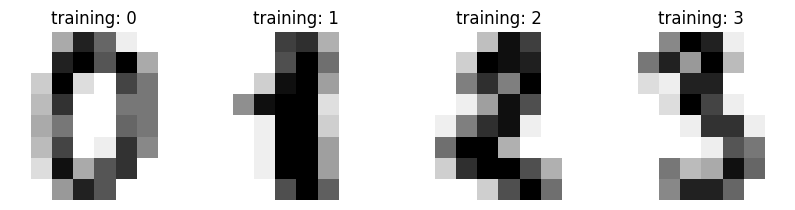

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("training: %i" % label)

**Data** **Preprocessing**

flatten image

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
df.images[0].shape

(8, 8)

In [10]:
len(df.images)

1797

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -10))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

**Scaling** **Image** **Data**

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data=data/16

In [19]:
data.min()

0.0

In [20]:
data.max()

1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train** **Test** **Split** **Data**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(data, df.target,test_size=0.3)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random** **forest** **Model**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf= RandomForestClassifier()

In [27]:
rf.fit(x_train,y_train)

RandomForestClassifier()

Predict Test Data

In [28]:
y_pred=rf.predict(x_test)

In [29]:
y_pred

array([0, 2, 9, 4, 4, 5, 7, 4, 2, 6, 3, 4, 0, 3, 8, 8, 6, 1, 1, 5, 1, 7,
       7, 0, 8, 1, 7, 2, 5, 9, 1, 9, 7, 6, 4, 6, 1, 4, 4, 7, 3, 9, 9, 9,
       1, 0, 3, 9, 7, 2, 5, 5, 2, 3, 1, 7, 7, 8, 2, 8, 0, 9, 1, 2, 7, 9,
       5, 5, 1, 1, 3, 8, 0, 1, 8, 3, 9, 2, 0, 7, 6, 7, 8, 5, 9, 4, 2, 4,
       4, 9, 2, 9, 4, 5, 7, 4, 5, 1, 8, 7, 1, 4, 1, 1, 1, 9, 2, 1, 8, 4,
       9, 2, 5, 3, 8, 7, 5, 2, 0, 2, 1, 5, 8, 3, 9, 7, 7, 4, 9, 0, 2, 5,
       9, 3, 3, 9, 2, 0, 4, 1, 5, 3, 4, 8, 6, 1, 9, 9, 0, 3, 5, 9, 6, 7,
       2, 7, 8, 3, 0, 3, 3, 3, 4, 3, 1, 1, 6, 1, 4, 3, 1, 8, 5, 7, 6, 9,
       0, 2, 4, 2, 8, 9, 7, 4, 7, 3, 6, 2, 9, 4, 4, 6, 5, 2, 4, 8, 1, 0,
       9, 2, 8, 5, 4, 6, 4, 8, 2, 5, 5, 5, 7, 2, 9, 0, 7, 8, 2, 4, 8, 0,
       2, 5, 7, 3, 2, 7, 1, 7, 8, 8, 0, 6, 5, 1, 2, 2, 5, 3, 3, 9, 7, 8,
       9, 2, 9, 8, 8, 3, 3, 0, 3, 2, 4, 1, 1, 0, 1, 0, 3, 8, 4, 1, 1, 5,
       1, 9, 7, 6, 8, 6, 5, 5, 3, 4, 7, 0, 5, 9, 0, 6, 3, 2, 5, 4, 4, 6,
       3, 9, 8, 4, 5, 4, 0, 4, 9, 4, 6, 0, 1, 9, 0,

**Model** **Accuracy**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test,y_pred)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 47,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  1],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 56]])

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.95      1.00      0.98        60
           2       0.98      0.98      0.98        59
           3       0.98      0.94      0.96        62
           4       0.98      1.00      0.99        57
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        46
           7       0.98      0.98      0.98        59
           8       0.91      0.91      0.91        43
           9       0.97      0.93      0.95        60

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

